In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import itertools
import community as community_louvain
import matplotlib.cm as cm
import torch_geometric.utils.convert
import warnings
warnings.filterwarnings('ignore')

### PubMed

In [2]:
path = 'pubmed_expln_graphs/diffusion/'

In [3]:
def get_node_type(node_type):
    if node_type == 1:
        return 'disease'
    elif node_type == 0:
        return 'gene'
    elif node_type == 2:
        return 'chemical'
    elif node_type == 3:
        return 'species'

In [4]:
required_edges = [('gene', 'gene'),
 ('gene', 'disease'),
 ('disease', 'disease'),
 ('chemical', 'gene'),
 ('chemical', 'disease'),
 ('chemical','chemical'),
 ('chemical','species'),
 ('species','gene'), 
 ('species','disease'),
 ('species','species' )]

In [5]:
def remove_edges(graph):
    

    #Get small graph edges
    edges = [e for e in graph.edges]
    
    node_types=nx.get_node_attributes(graph, "color_val")
   
    source,dest =list(map(list, zip(*edges)))
    remaining_edges = []
    
    for i in range(len(edges)):
        source_node_type = get_node_type(node_types[source[i]])
        dest_node_type = get_node_type(node_types[dest[i]])
        
        if not (source_node_type,dest_node_type) in required_edges:
            remaining_edges.append((source[i],dest[i]))
    
    graph.remove_edges_from(remaining_edges)        
    graph.remove_nodes_from(list(nx.isolates(graph)))

#     print('node count',graph.number_of_nodes())
#     print('edge count',graph.number_of_edges())
#     print(remaining_edges)
    return graph

In [6]:
def plot_graph(G):

    color_class_map = {0: 'blue', 1: 'red', 2: 'darkgreen', 3: 'orange'}

    nx.draw(G, 
        with_labels=False, node_color=[color_class_map[node[1]['color_val']] 
                        for node in G.nodes(data=True)], 
            node_size=200,
        font_color='white')
    plt.show() 

In [7]:
def plot_partition(G,partition):
    # draw the graph
    pos = nx.spring_layout(G)
    # color the nodes according to their partition
    cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
    nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=100,label=True,
                            cmap=cmap, node_color=list(partition.values()))
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    plt.show()

In [8]:
def detect_community(G):
    partition = community_louvain.best_partition(G)
    plot_partition(G,partition)

Explanation graph of class 0

In [9]:
class0_graph = nx.read_gexf(path+'4.gexf')

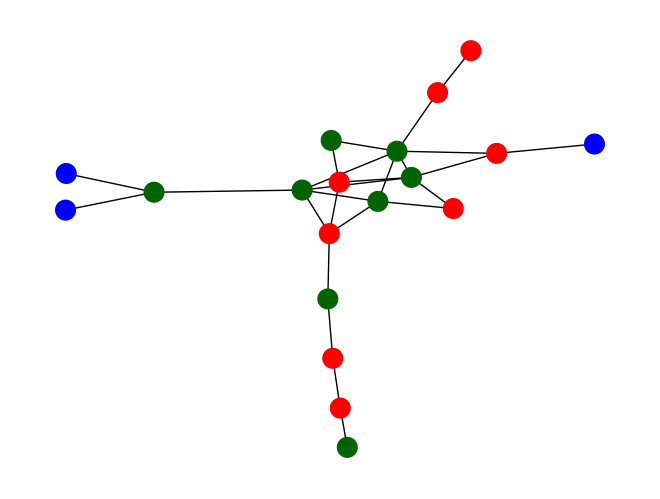

In [36]:
class0 = remove_edges(class0_graph)
plot_graph(class0)

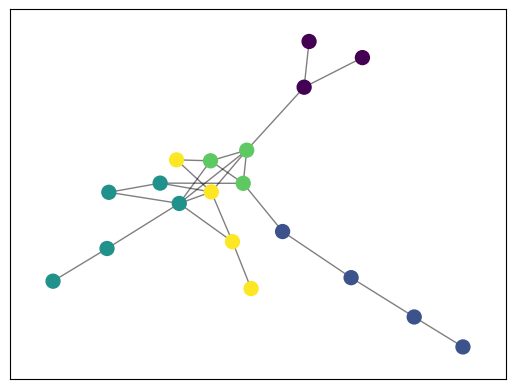

[{'0', '2', '3'},
 {'1', '18', '6'},
 {'10', '11'},
 {'12', '13', '15', '4'},
 {'14', '16', '17', '5', '7', '8', '9'}]

In [11]:
detect_community(class0)
list_com= nx.community.louvain_communities(class0, seed=123)
list_com

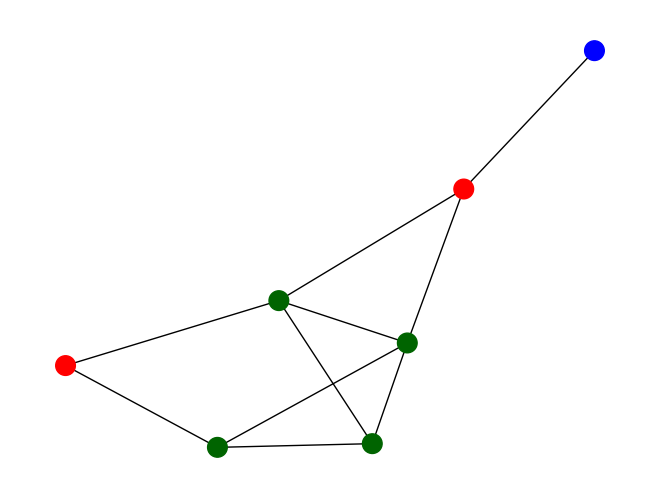

In [12]:
#Largest substructure
H = class0.subgraph(max(list_com, key=len))
plot_graph(H)

Explanation graph of class 1

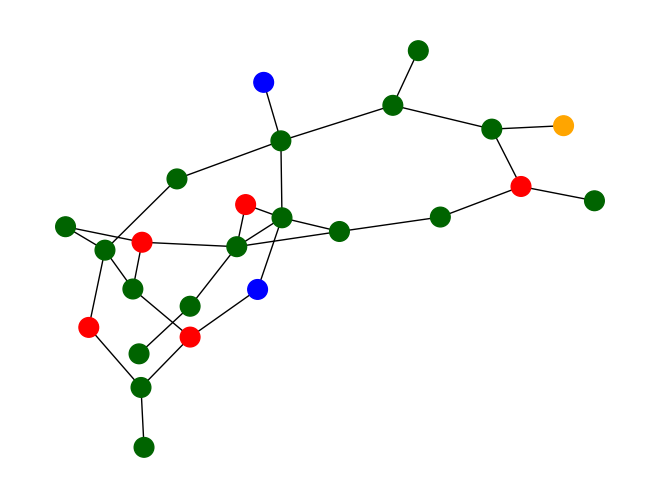

In [13]:
class1_graph = nx.read_gexf(path+'181.gexf')
class1 = remove_edges(class1_graph)
plot_graph(class1)

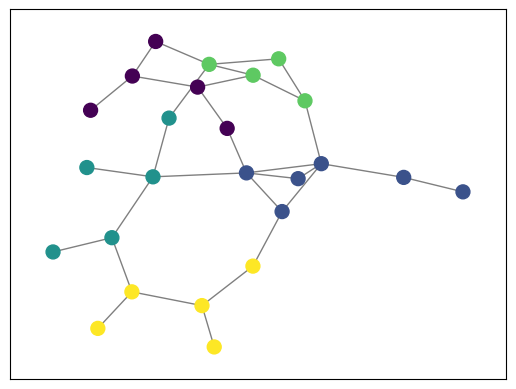

[{'11', '18', '21', '22', '5'},
 {'10', '12', '13', '14', '15', '17', '20', '23', '3', '6'},
 {'26', '27', '28', '29'},
 {'16', '24', '4', '7', '8', '9'}]

In [14]:
detect_community(class1)
list_com= nx.community.louvain_communities(class1, seed=123)
list_com

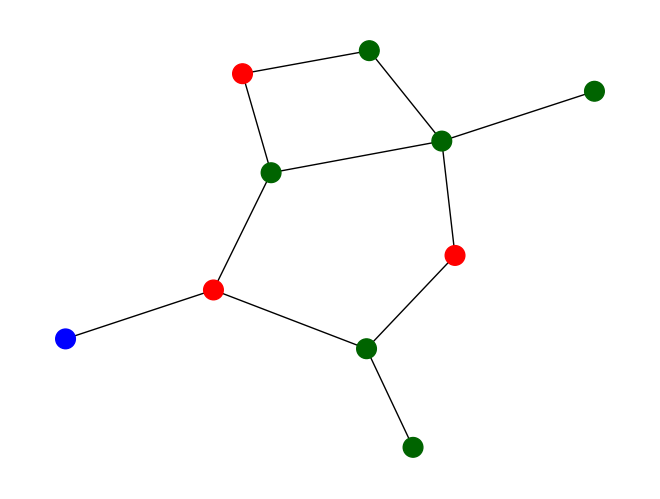

In [15]:
#Largest substructure
H = class1.subgraph(max(list_com, key=len))
plot_graph(H)

Explanation graph of class 2

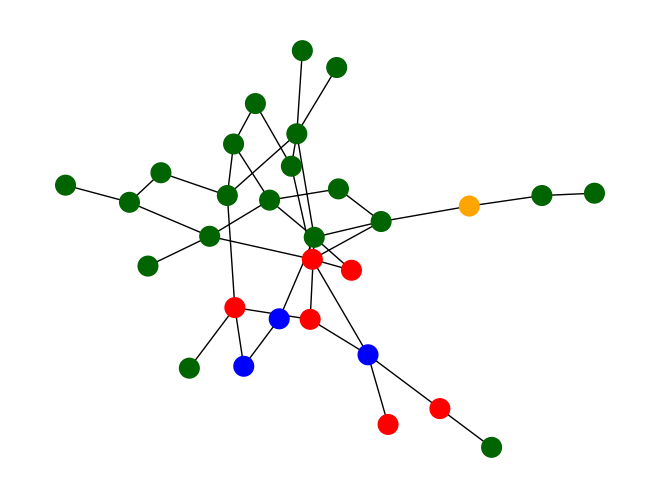

In [16]:
class2_graph = nx.read_gexf(path + '8.gexf')
class2 = remove_edges(class2_graph)
plot_graph(class2)

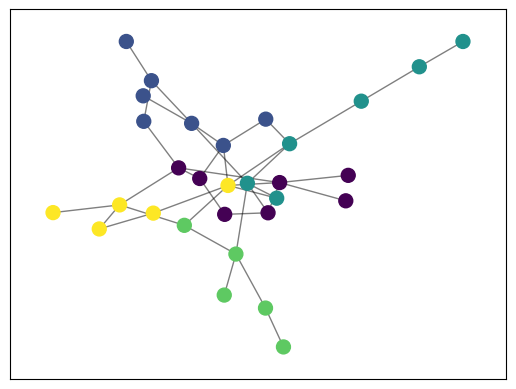

[{'11', '12', '21', '8', '9'},
 {'0', '15', '16', '3', '5'},
 {'1', '13', '14', '28'},
 {'18', '22', '23', '26', '4', '6'},
 {'17', '19', '2', '25', '29'},
 {'10', '20', '24', '27', '7'}]

In [17]:
detect_community(class2)
list_com= nx.community.louvain_communities(class2, seed=123)
list_com

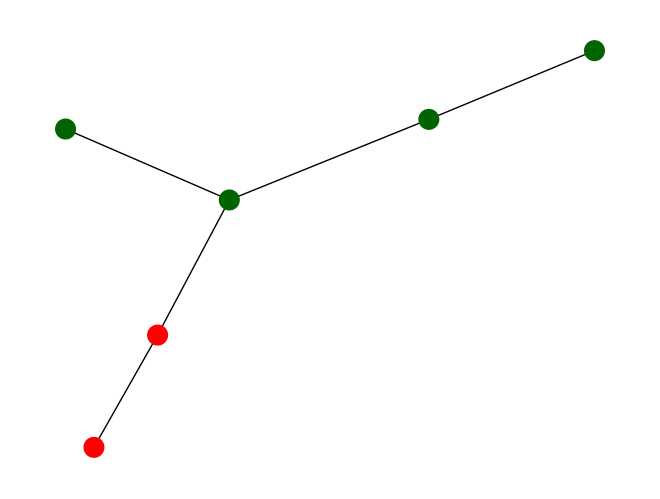

In [18]:
#Largest substructure
H = class2.subgraph(max(list_com, key=len))
plot_graph(H)

Explanation graph of class 3

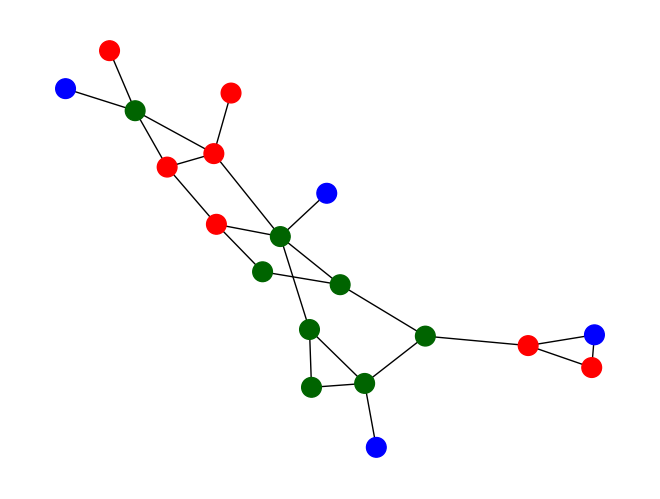

In [19]:
class3_graph = nx.read_gexf(path + '127.gexf')
class3 = remove_edges(class3_graph)
plot_graph(class3)

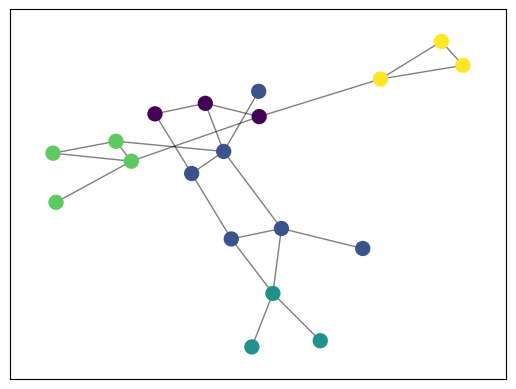

[{'1', '13', '15', '3', '4', '7', '9'},
 {'0', '16', '2'},
 {'6', '8'},
 {'11', '12', '14'},
 {'17', '18', '19', '5'}]

In [20]:
detect_community(class3)
list_com= nx.community.louvain_communities(class3, seed=123)
list_com

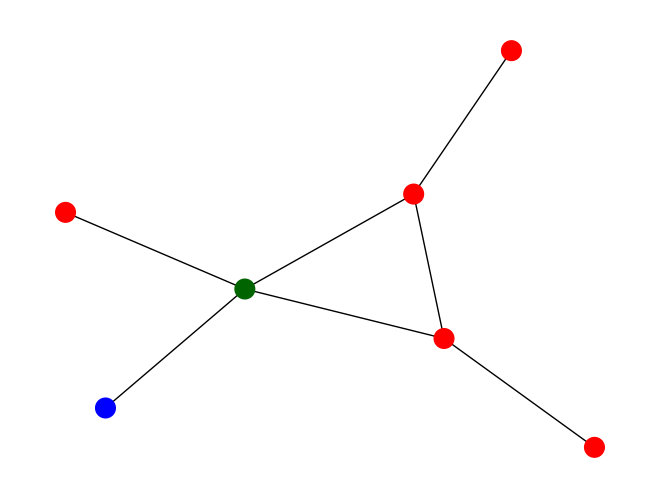

In [22]:
#Largest substructure
H = class3.subgraph(max(list_com, key=len))
plot_graph(H)	

Explanation graph of class 4

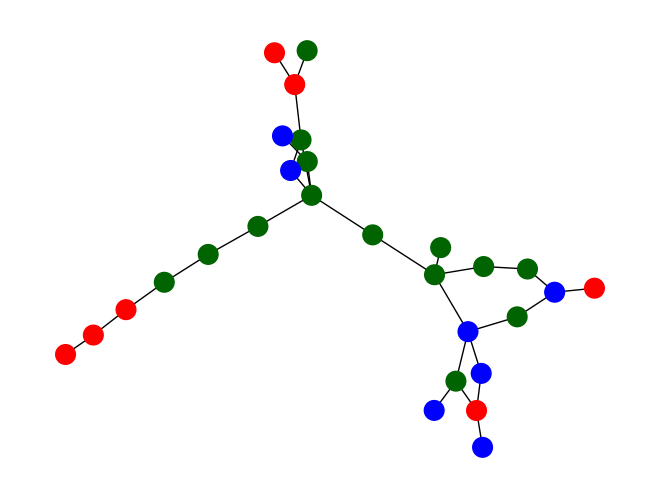

In [23]:
class4_graph = nx.read_gexf(path + '162.gexf')
class4 = remove_edges(class4_graph)
plot_graph(class4)

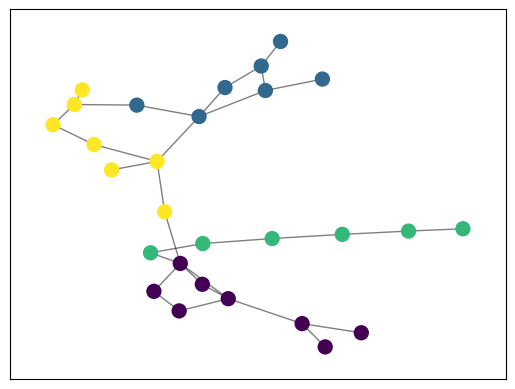

[{'2', '6', '8'},
 {'13', '14', '19', '20', '24', '29', '3'},
 {'11', '15', '17', '18', '28', '5'},
 {'21', '22', '23', '27', '30', '4', '9'},
 {'0', '16', '25', '31', '32'}]

In [24]:
detect_community(class4)
list_com= nx.community.louvain_communities(class4, seed=123)
list_com

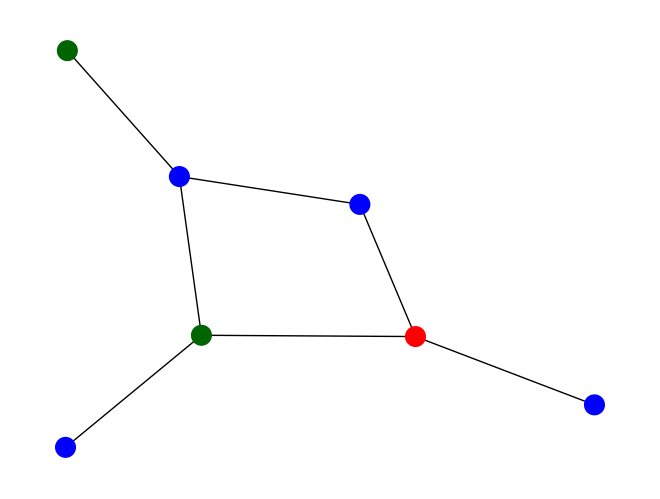

In [25]:
#Largest substructure
H = class4.subgraph(max(list_com, key=len))
plot_graph(H)	

Explanation graph of class 5

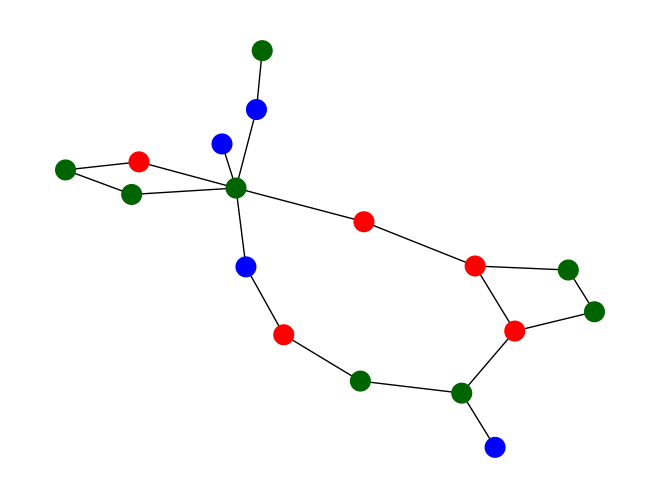

In [26]:
class5_graph = nx.read_gexf(path + '131.gexf')
class5 = remove_edges(class5_graph)
plot_graph(class5)

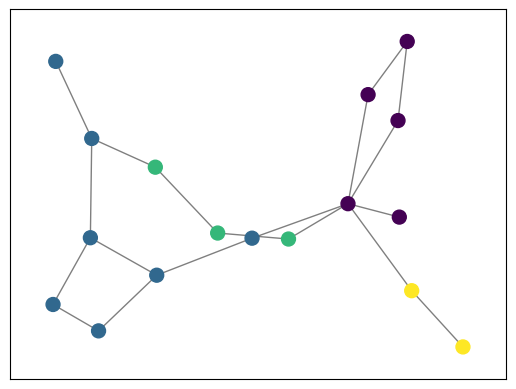

[{'11', '17', '19', '2', '4', '5', '8'},
 {'1', '10', '13', '14', '6'},
 {'15', '16', '7'},
 {'18', '9'}]

In [27]:
detect_community(class5)
list_com= nx.community.louvain_communities(class5, seed=123)
list_com

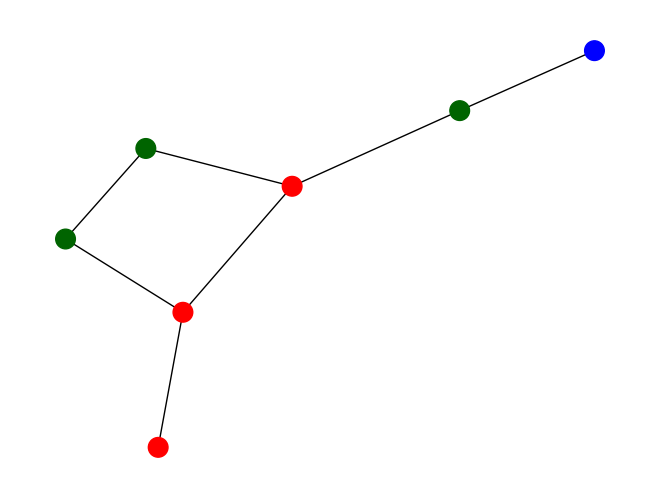

In [31]:
#Largest substructure
H = class5.subgraph(max(list_com, key=len))
plot_graph(H)

Explanation graph of class 6

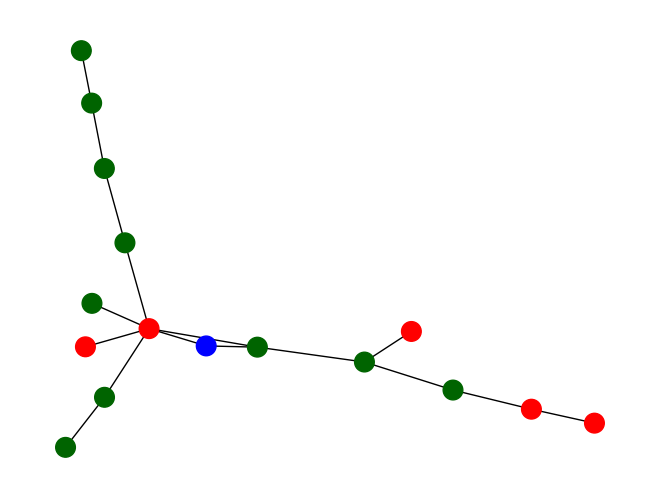

In [32]:
class6_graph = nx.read_gexf(path + '47.gexf')
class6 = remove_edges(class6_graph)
plot_graph(class6)

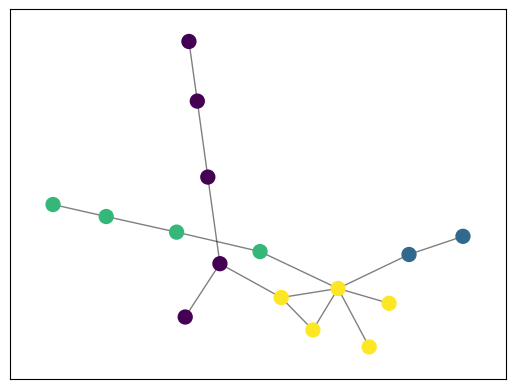

[{'16', '17', '2', '3', '6'},
 {'0', '1', '18', '5', '9'},
 {'13', '14', '19', '7'},
 {'11', '8'}]

In [33]:
detect_community(class6)
list_com= nx.community.louvain_communities(class6, seed=123)
list_com

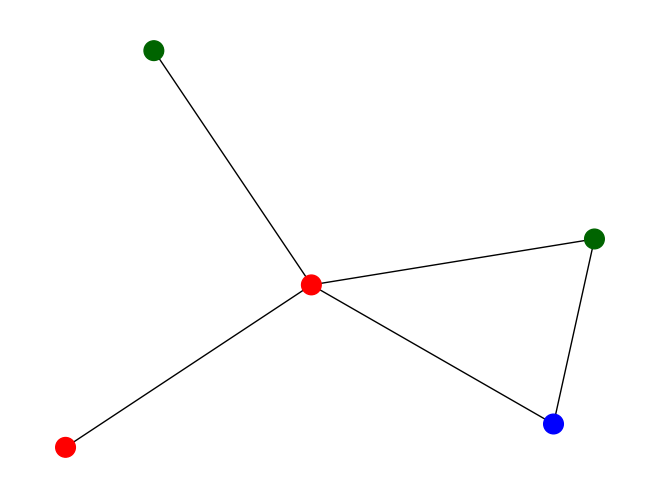

In [34]:
#Largest substructure
H = class6.subgraph(max(list_com, key=len))
plot_graph(H)	